In [78]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [3]:
atm_neutrino_fluxes = "./../data/atm_flux.txt"
cross_sections = "./../data/nu_xs.txt"

In [37]:
def read_flux_file(f):
    d={}
    log_e, nue, numu, nuebar, numubar = ([] for i in range (5))
    File = open(f,"r")
    lines = File.readlines()
    for line in lines:
        columns = line.split(' ')
        log_e.append(float(columns[0]))
        nue.append(float(columns[1]))
        numu.append(float(columns[2]))
        nuebar.append(float(columns[3]))
        numubar.append(float(columns[4]))
    d["log_E"]=np.array(log_e)
    d["E"]=np.power(10, np.array(log_e))
    d["nu_e"]=np.array(nue)
    d["nu_mu"]=np.array(numu)
    d["nu_e_bar"]=np.array(nuebar)
    d["nu_mu_bar"]=np.array(numubar)
    File.close()
    return d

In [38]:
def read_xs_file(f):
    d={}
    log_e, cc_nu, nc_nu, cc_nu_bar, nc_nu_bar = ([] for i in range(5))
    File = open(f,"r")
    lines = File.readlines()
    for line in lines:
        columns = line.split(' ')
        log_e.append(float(columns[0]))
        cc_nu.append(float(columns[1]))
        nc_nu.append(float(columns[2]))
        cc_nu_bar.append(float(columns[3]))
        nc_nu_bar.append(float(columns[4]))
    d["log_E"]=np.array(log_e)
    d["E"]=np.power(10, np.array(log_e))
    d["cc_nu"]=np.array(cc_nu)
    d["nc_nu"]=np.array(nc_nu)
    d["cc_nu_bar"]=np.array(cc_nu_bar)
    d["nc_nu_bar"]=np.array(nc_nu_bar)
    File.close()
    return d

In [39]:
flux_d = read_flux_file(atm_neutrino_fluxes)

# Astrophysical neutrino flux

We use the astrophysical flux detected by IceCube, as reported in this paper: https://arxiv.org/pdf/2001.09520.pdf

There, the simplest parameterisation of the astrophysical neutrino flux is given by the following expression

$\frac{\Phi _{astro} ^{\nu + \bar{\nu}}(E)}{C_0} = \phi _{astro}\cdot \left(\frac{E}{E_0}\right) ^{-\gamma}$ 

where $C_0 = 3\cdot 10^{-18} \text{GeV} ^{-1} \cdot \text{cm} ^{-2}\cdot \text{s} ^{-1}\cdot \text{sr} ^{-1}$ 

and $E_0=100 \text{TeV}$.

The values of the spectral index and flux normalisation which best fit the icecube data are $\gamma = 2.53$ and $\phi _{astro} = 1.66$.

In this fit, it is assumed that every neutrino flavor conttributes equally to the flux.

In [74]:
# best fit 2020
C0 = 3e-18
E0 = 100e3
gamma = 2.53
phi = 1.66

# best fit 2016
# C0 = 1e-18
# E0 = 100e3
# gamma = 2.13
# phi = 0.9

Phi = lambda x : C0 * phi * np.power((x/E0), -gamma)

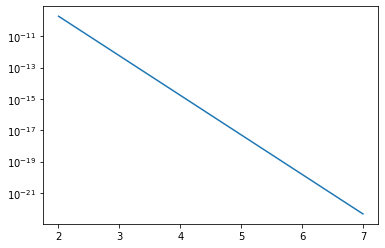

In [75]:
plt.yscale("log")
plt.plot(flux_d["log_E"], Phi(flux_d["E"]))

In [40]:
xs_d = read_xs_file(cross_sections)

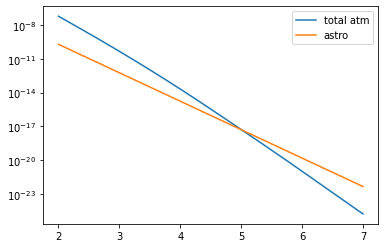

In [76]:
plt.yscale("log")
factor = 1.e-4/(4*np.pi)
# plt.plot(flux_d["log_E"],flux_d["nu_mu"]*factor, label=r'$\nu_{\mu}$')
# plt.plot(flux_d["log_E"],flux_d["nu_e"]*factor, label=r'$\nu_{e}$')
# plt.plot(flux_d["log_E"],flux_d["nu_mu_bar"]*factor, label=r'$\bar{\nu}_{\mu}$')
# plt.plot(flux_d["log_E"],flux_d["nu_e_bar"]*factor, label=r'$\bar{\nu}_{e}$')
plt.plot(flux_d["log_E"],factor*(flux_d["nu_mu"] + flux_d["nu_e"] + flux_d["nu_mu_bar"] + flux_d["nu_e_bar"]), label = 'total atm')

plt.plot(flux_d["log_E"], Phi(flux_d["E"]), label='astro')
plt.legend()
#flux_d["nu_mu"]

In [77]:
def Phi_atm(x, phi_atm, gamma_atm): 
    return phi_atm * np.power((x), -gamma_atm)    

In [86]:
a,b = curve_fit(Phi_atm, flux_d["E"][700:], flux_d["nu_mu"][700:], maxfev=2000 )

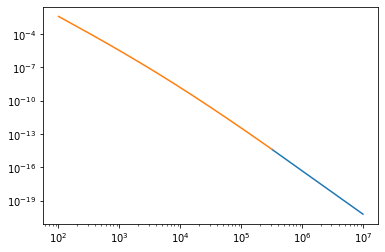

In [89]:
plt.yscale("log")
plt.xscale("log")
plt.plot(flux_d["E"][700:], Phi_atm(flux_d["E"][700:], a[0], a[1]), label='Fitted function')
plt.plot(flux_d["E"][:700],flux_d["nu_mu"][:700], label="data")